<a href="CI"><img src="http://www.ci.ufpb.br/ci/contents/imagens/site/logo-ci.jpeg" width="125" title="Logo CI" /></a>

# Análise de dados sobre acidentes de trânsito em João Pessoa - Paraíba 
Feito por: Emmanuel Aprigio Cavalvanti dos Santos 

In [ ]:
# instalando a biblioteca geopandas com o conda
!conda install geopandas -y
!conda list geopandas

^C


In [ ]:
# instalando a biblioteca matplotlib com o conda
!conda install matplotlib -y
!conda list matplotlib

In [ ]:
# instalando a biblioteca descartes com o conda
-c conda-forge descartes 
!conda list descartes

In [ ]:
# instalando a biblioteca shapely com o conda
!conda install shapely -y
!conda list shapely

# introdução
Acidentes de trânsito causam 5 mortes no Brasil a cada 1 hora, informa um relatório divulgado pelo Conselho Federal de Medicina. Um balanço feito separadamente nos últimos anos, no qual aponta que os acidentes de trânsito deixaram mais de 1,6 milhão de feridos. Isso levou um aumento no uso do Serviço de Atendimento Móvel de Urgência (SAMU)
O objetivo desta base de dados tem como intenção trabalhar com o SAMU para evitar acidentes de trânsito no município João Pessoa, Paraíba.


Para isso iremos ultilazar as bibliotecas:
*   [geopandas](https://geopandas.org/) Version 0.12.0 
*   [matplotlib](https://matplotlib.org/stable/users/index.html) Version 3.5.1
*   [pandas](https://pandas.pydata.org/) Version 1.4.2
*   [descartes](https://pypi.org/project/descartes/) Version 1.1.0
*   [shapely](https://shapely.readthedocs.io/en/stable/manual.html) Version 1.8.5.post1

A coleta de dados foi realizada a partir dos dados disponíveis no site da [Polícia Rodoviária Federal](https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes) sobre acidentes em Rodovias Federais.
Foram ultilizados os dados apenas para o Município de João Pessoa no estado da Paraíba referentes ao ano de 2022.6 até 2017.


In [1]:
#importar as bibliotecas
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

# Lendo os dados 
Leitura feita com geopandas, foram atribuida para a varivel nesse estilo: *data_anoRespectivo.

Os dados foram ferificados para não conter informações duplicadas e valores NaN (vazios).

Unificação dos arquivos feita com pandas para um arquivo único: dadosjoaopessoa.csv

O arquivo aprensenta 1809 linhas e 31 colunas

In [2]:
#ler os dados separados com o geo pandas
data_2022 = gpd.read_file('datatran2022.csv')
data_2021 = gpd.read_file('datatran2021.csv')
data_2020 = gpd.read_file('datatran2020.csv')
data_2019 = gpd.read_file('datatran2019.csv')
data_2018 = gpd.read_file('datatran2018.csv')
data_2017 = gpd.read_file('datatran2017.csv')

In [4]:
#filtrar somente o municipio de joão pessoa 
#gdf_JP20XX é a variavel no qual guarda o GeoDataframe de joão pessoa ano respectivo
gdf_jp2022 = data_2022[data_2022 ['municipio'] == 'JOAO PESSOA']
gdf_jp2021 = data_2021[data_2021 ['municipio'] == 'JOAO PESSOA']
gdf_jp2020 = data_2020[data_2020 ['municipio'] == 'JOAO PESSOA']
gdf_jp2019 = data_2019[data_2019 ['municipio'] == 'JOAO PESSOA']
gdf_jp2018 = data_2018[data_2018 ['municipio'] == 'JOAO PESSOA']
gdf_jp2017 = data_2017[data_2017 ['municipio'] == 'JOAO PESSOA']

In [5]:
#salvando para .csv
#2022
gdf_jp2022.to_csv('dadosjoaopessoa2022.csv',index = False)
gdf_jp2022 = pd.read_csv('dadosjoaopessoa2022.csv')
#2021
gdf_jp2021.to_csv('dadosjoaopessoa2021.csv',index = False)
gdf_jp2021 = pd.read_csv('dadosjoaopessoa2021.csv')
#2020
gdf_jp2020.to_csv('dadosjoaopessoa2020.csv',index = False)
gdf_jp2020 = pd.read_csv('dadosjoaopessoa2020.csv')
#2019
gdf_jp2019.to_csv('dadosjoaopessoa2019.csv',index = False)
gdf_jp2019 = pd.read_csv('dadosjoaopessoa2019.csv')
#2018
gdf_jp2018.to_csv('dadosjoaopessoa2018.csv',index = False)
gdf_jp2018 = pd.read_csv('dadosjoaopessoa2018.csv')
#2017
gdf_jp2017.to_csv('dadosjoaopessoa2017.csv',index = False)
gdf_jp2017 = pd.read_csv('dadosjoaopessoa2017.csv')

In [2]:
#consolidar os aquivos CSV utilizando o prompt de comando para apenas um único.
data_joaopessoa = pd.read_csv('dadosjoaopessoa.csv')

In [3]:
#verificar se ha presença de duplicatas para filtrar esses resultados.
data_joaopessoa['id'].duplicated().value_counts()
#não exitem duplicadas

False    1809
Name: id, dtype: int64

In [4]:
#mostrar as colunas da base de dados
data_joaopessoa.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'geometry'],
      dtype='object')

# Quais os principais motivos para óbito em  acidente de carro em João Pessoa?


In [26]:
dataAcidentes = data_joaopessoa['data_inversa'].value_counts().to_dict()

# Quais os tipos mais comuns de acidentes de trânsito
Quais foram os tipos mais comuns de acidentes de transito neste período?


In [5]:
tiposAcidentes = data_joaopessoa['tipo_acidente'].value_counts().to_dict()
tiposAcidentes

{'Colisão traseira': 586,
 'Colisão lateral': 206,
 'Tombamento': 192,
 'Colisão com objeto estático': 149,
 'Engavetamento': 134,
 'Colisão transversal': 106,
 'Atropelamento de Pedestre': 97,
 'Queda de ocupante de veículo': 97,
 'Saída de leito carroçável': 68,
 'Colisão lateral mesmo sentido': 53,
 'Colisão com objeto': 31,
 'Colisão frontal': 22,
 'Capotamento': 20,
 'Atropelamento de Animal': 20,
 'Incêndio': 10,
 'Colisão com objeto em movimento': 8,
 'Derramamento de carga': 3,
 'Danos eventuais': 3,
 'Eventos atípicos': 3,
 'tipo_acidente': 1}

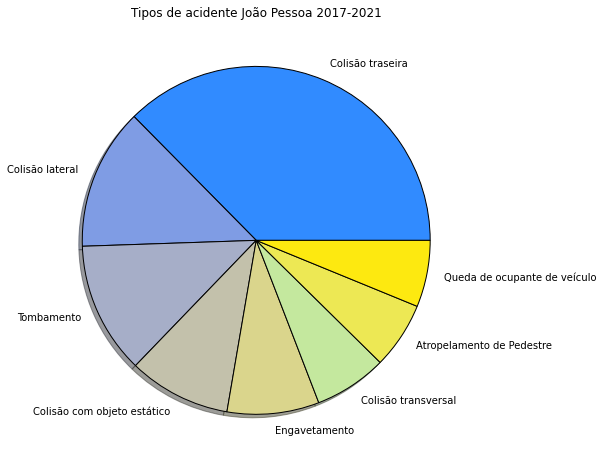

In [11]:
#definição das cores que vão ser usadas
colors= ["#318bff", "#7f9ce4", '#a6aec8', '#c3c1ab', "#dad58c", "#c4e89e", "#ede854", "#fde910"]
#gráfico de pizza sobre os tipo de acidentes

plt.title("Tipos de acidente João Pessoa 2017-2021")

fatias=[val for index, val in enumerate(tiposAcidentes.values()) if index<8]
labels_causas=[val for index, val in enumerate(tiposAcidentes.keys()) if index<8]


plt.rcParams["figure.figsize"] = (12,8)
plt.pie(fatias, labels= labels_causas, shadow= True,  wedgeprops= {'edgecolor': 'black'}, colors= colors)


plt.show()

# Quais as causas mais comuns de acidentes de trânsito
Quais foram as causas mais comuns de acidentes de transito neste período?


In [7]:
causasAcidentes = data_joaopessoa['causa_acidente'].value_counts().to_dict()
causasAcidentes

{'Falta de Atenção à Condução': 493,
 'Não guardar distância de segurança': 317,
 'Velocidade Incompatível': 138,
 'Desobediência às normas de trânsito pelo condutor': 128,
 'Ingestão de Álcool': 113,
 'Defeito Mecânico no Veículo': 67,
 'Pista Escorregadia': 49,
 'Ausência de reação do condutor': 48,
 'Reação tardia ou ineficiente do condutor': 46,
 'Condutor deixou de manter distância do veículo da frente': 44,
 'Falta de Atenção do Pedestre': 41,
 'Manobra de mudança de faixa': 36,
 'Avarias e/ou desgaste excessivo no pneu': 30,
 'Animais na Pista': 24,
 'Acessar a via sem observar a presença dos outros veículos': 22,
 'Ingestão de álcool pelo condutor': 17,
 'Condutor Dormindo': 17,
 'Defeito na Via': 15,
 'Trafegar com motocicleta (ou similar) entre as faixas': 15,
 'Demais falhas mecânicas ou elétricas': 12,
 'Desobediência às normas de trânsito pelo pedestre': 10,
 'Carga excessiva e/ou mal acondicionada': 9,
 'Ultrapassagem Indevida': 9,
 'Entrada inopinada do pedestre': 9,
 'S

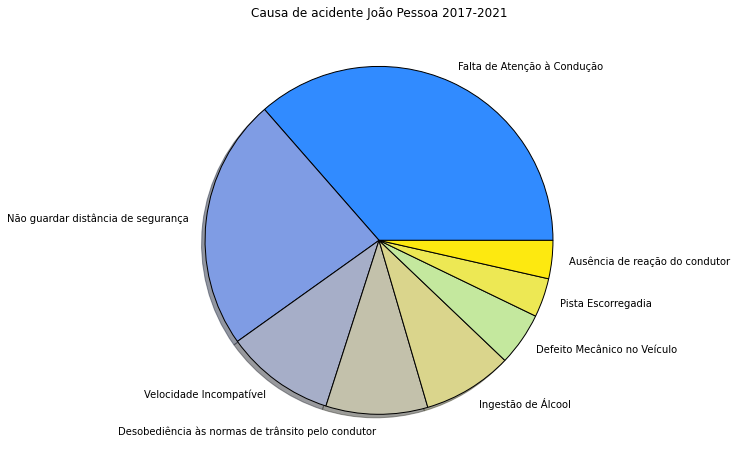

In [8]:
#gráfico de pizza sobre as causas de acidentes

plt.title("Causa de acidente João Pessoa 2017-2021")

fatias=[val for index, val in enumerate(causasAcidentes.values()) if index<8]
labels_causas=[val for index, val in enumerate(causasAcidentes.keys()) if index<8]

plt.rcParams["figure.figsize"] = (12,8)
plt.pie(fatias, labels= labels_causas, shadow= True,  wedgeprops= {'edgecolor': 'black'}, colors= colors)


plt.show()

In [ ]:
# importar os objetos geométricos da biblioteca shapely
from shapely.geometry import Point, LineString, Polygon

In [ ]:
#criar uma geometria do tipo ponto 
ponto = Point(5,10)

In [ ]:
# ultilizando a função coords
list (ponto.coords)